# Exploratery Data Analysis

## Sibt ul Hussain

There are enumerous useful visualization techniques that are useful for exploratory data analysis: In practice, the choice highly depends on the kind of data and the question at hand. 

This IPython notebook is a small gallery for visualizing the Iris flower dataset. This gallery is more meant to be a code matplotlib reference so that certain plots may be more or less useful in the context of this dataset. 

## Reading in the dataset

[[back to top](#Sections)]

In [4]:
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [5]:
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns

In [7]:
data=pd.read_csv('./Data/iris.data')
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
print data.describe()

       SepalLength  SepalWidth  PetalLength  PetalWidth
count   149.000000  149.000000   149.000000  149.000000
mean      5.848322    3.051007     3.774497    1.205369
std       0.828594    0.433499     1.759651    0.761292
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.400000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


In [97]:
# convert pandas DataFrame to simple numpy arrays
X = data[[0,1,2,3]].values
Y = data['Class'].values
labels = {}
for i,v in enumerate(np.unique(Y)):
    labels[v] = i
    Y[Y==v] = i
Y= Y.astype(np.int8)

## Pie chart

Plot the distribution of classes as pie chart. See the documentation for details of pie plot.

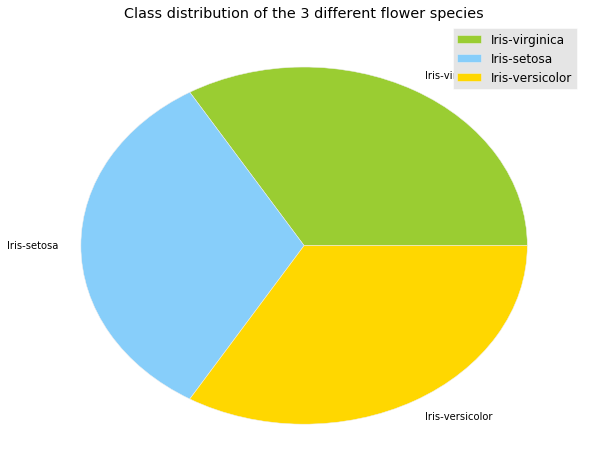

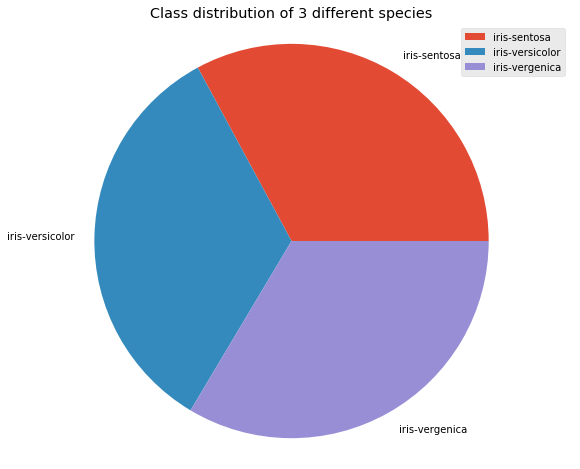

In [35]:
classes_names =  np.unique(data['Class'].values)
classes_count = [0]*3
classes_count[0] = data[data['Class'] == Y[0]].count()[0]
classes_count[1] = data[data['Class'] == Y[1]].count()[0]
classes_count[2] = data[data['Class'] == Y[2]].count()[0]
labels = ['iris-sentosa','iris-versicolor','iris-vergenica'];
fig, axes = plt.subplots()
axes.pie(classes_count,labels=labels)
plt.axis('equal');
axes.set_title('Class distribution of 3 different species')
plt.legend(['iris-sentosa','iris-versicolor','iris-vergenica'])
plt.show()

## Bar plot

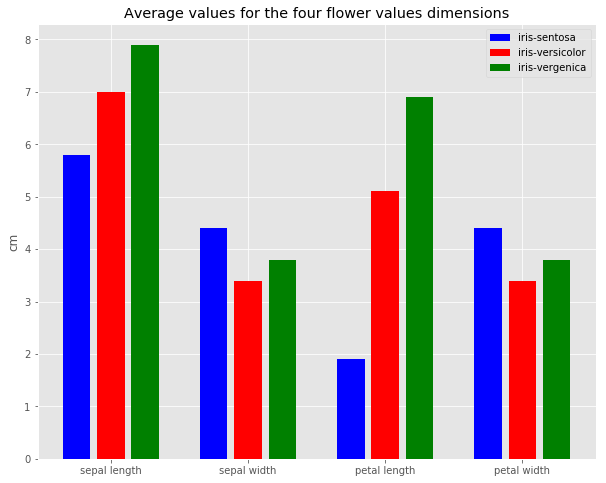

In [96]:
for itr in range(0,3):
    classes[itr] = data[data['Class'] == Y[itr]]
    petal_length[itr] = np.array(classes[itr]['PetalLength'])
    petal_width[itr] = np.array(classes[itr]['PetalWidth'])
    sepal_width[itr] = np.array(classes[itr]['SepalWidth'])
    sepal_length[itr] = np.array(classes[itr]['SepalLength'])
figure,axes = plt.subplots()
x = (1,5,9,13)
axes.bar(x,(np.max(sepal_length[0]),np.max(sepal_width[0]),np.max(petal_length[0]),np.max(sepal_width[0])),color='b')
x = (2,6,10,14)
axes.bar(x,(np.max(sepal_length[1]),np.max(sepal_width[1]),np.max(petal_length[1]),np.max(sepal_width[1])),color='r',tick_label=['sepal length','sepal width','petal length','petal width'])
x = (3,7,11,15)
axes.bar(x,(np.max(sepal_length[2]),np.max(sepal_width[2]),np.max(petal_length[2]),np.max(sepal_width[2])),color='g')
axes.set_title('Average values for the four flower values dimensions')
axes.set_ylabel('cm')
plt.legend(['iris-sentosa','iris-versicolor','iris-vergenica'])

## 1D Histogram

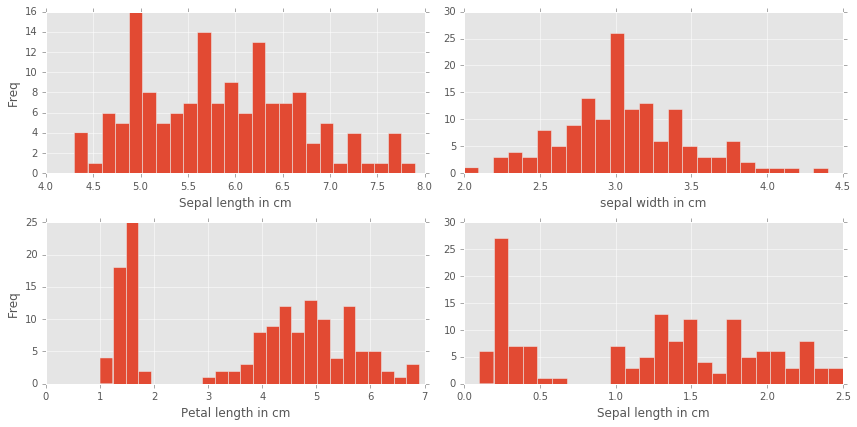

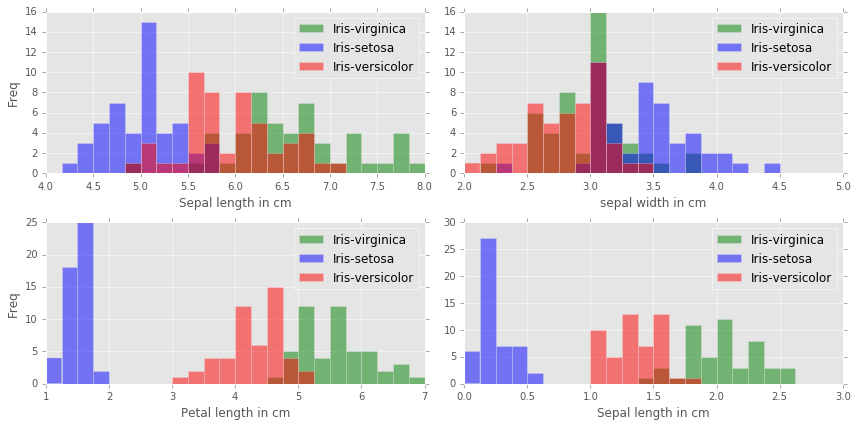

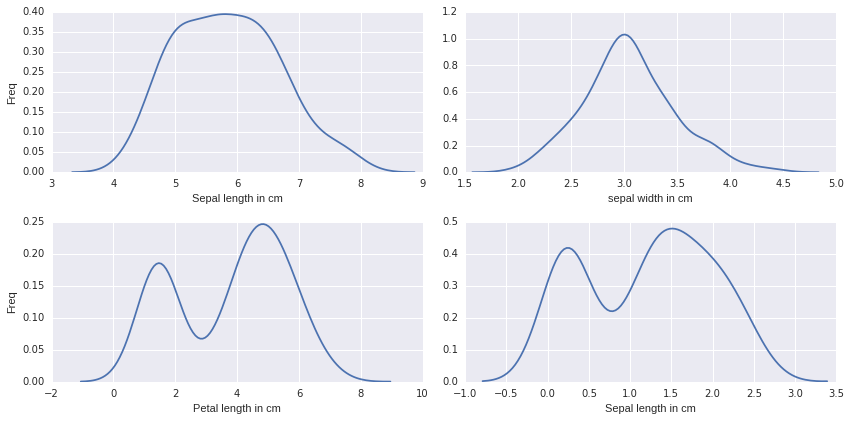

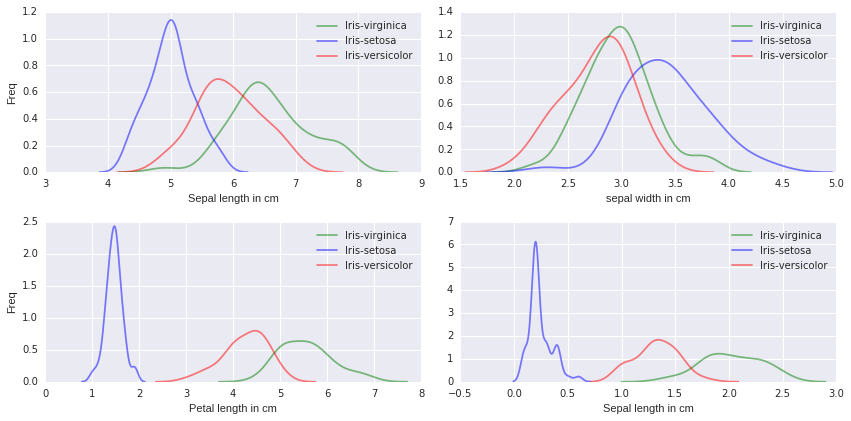

## Scatter plot

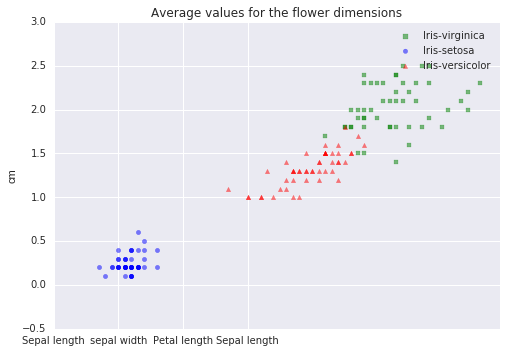

## 3D Scatter plot

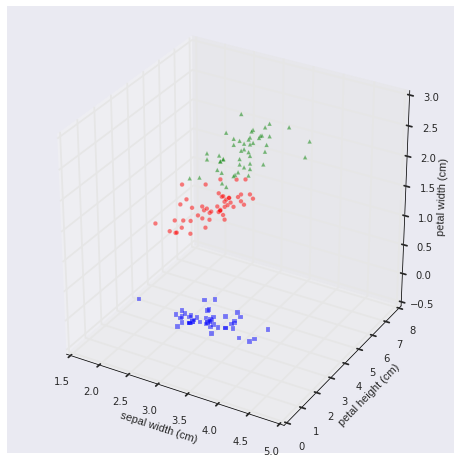

# More than two variables

In [94]:
data.columns

Index([u'SepalLength', u'SepalWidth', u'PetalLength', u'PetalWidth', u'Class'], dtype='object')

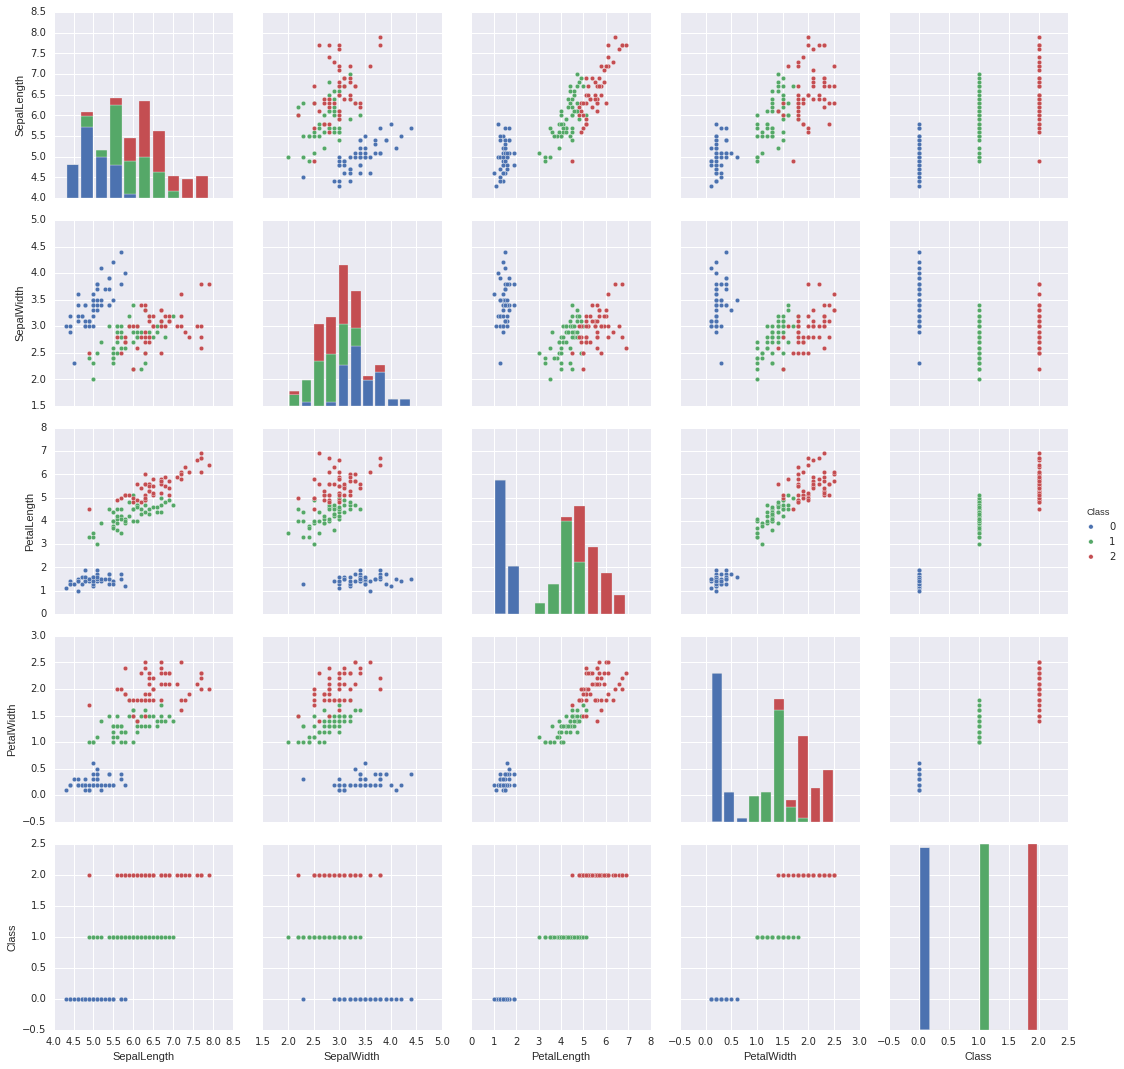

In [96]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
sns.pairplot(data, hue="Class", size=3)

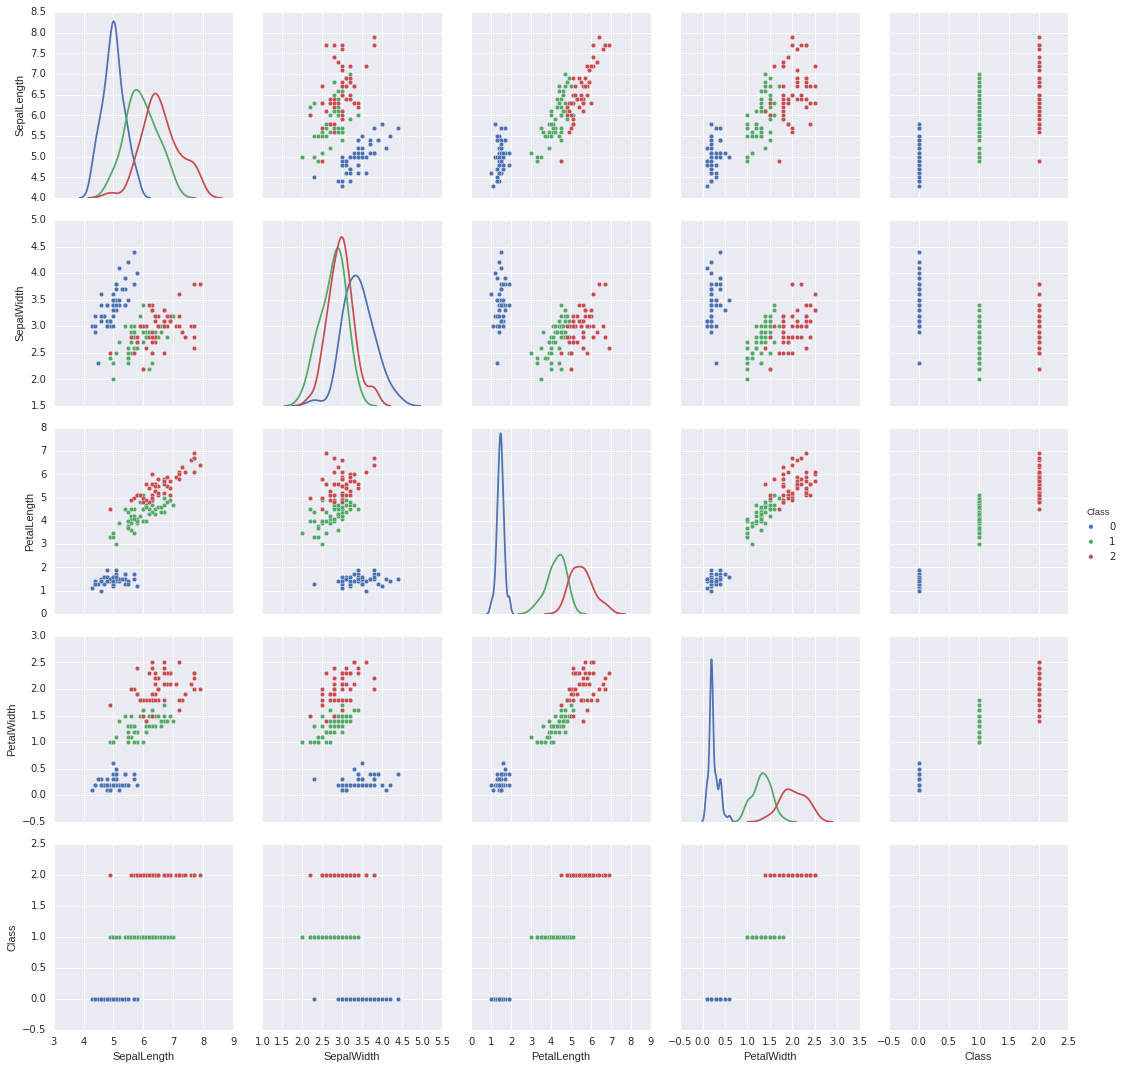

In [97]:
sns.pairplot(data, hue="Class", size=3, diag_kind="kde")

In [58]:
def boxPlotByFeature(data,axes,xlabel):
    #Plots a box plot for a given feature by class...
    classes=np.unique(data['Class'].dropna())
    legends=[c for c in classes]
    x=data[data['Class']==classes[0]][xlabel].dropna();
    y=data[data['Class']==classes[1]][xlabel].dropna();
    z=data[data['Class']==classes[2]][xlabel].dropna();
    t=[]
    t.append(list(x))
    t.append(list(y))
    t.append(list(z))
    axes.boxplot(t)
    axes.set_xticklabels(legends)
    axes.set_title('Feature={}'.format(xlabel))

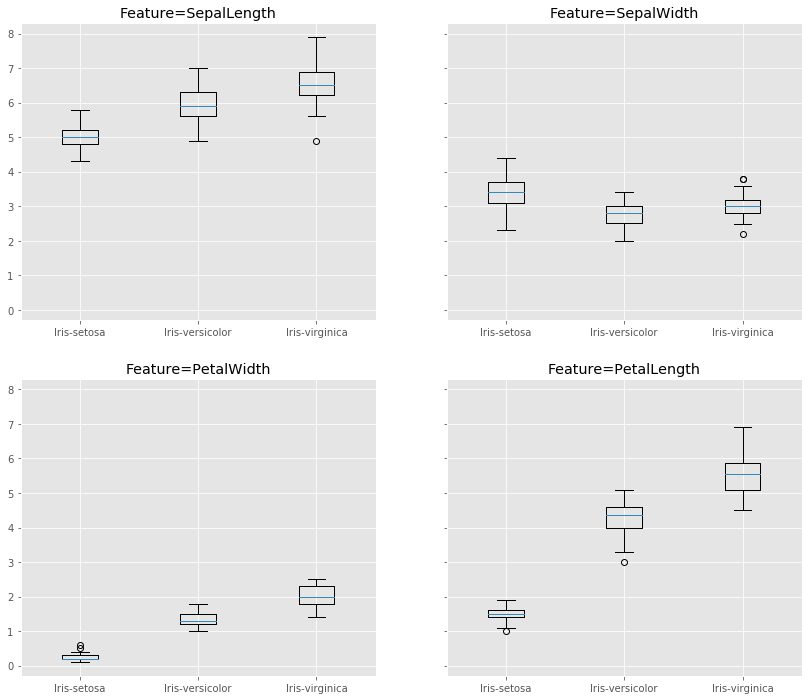

In [59]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(14,12),squeeze=False,sharey=True,)

features=['SepalLength','SepalWidth','PetalWidth','PetalLength']

boxPlotByFeature(data,axes[0,0],features[0])
boxPlotByFeature(data,axes[0,1],features[1])
boxPlotByFeature(data,axes[1,0],features[2])
boxPlotByFeature(data,axes[1,1],features[3])

In [99]:
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']

([<matplotlib.axis.XTick at 0x7f75423fc310>,
 <a list of 4 Text xticklabel objects>)

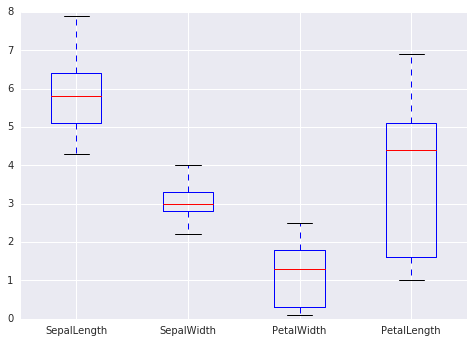

In [100]:
#flier_high = q3+1.5* interquartile-range
# flier_low = q1-1.5* interquartile-range
# mid-point=median

# basic plot
pdata=data[['SepalLength','SepalWidth','PetalWidth','PetalLength']].dropna()
plt.boxplot(np.asarray(pdata))
# plt.set_xlabel()
pylab.xticks([1, 2, 3,4],['SepalLength','SepalWidth','PetalWidth','PetalLength'])

In [113]:
def boxPlotByClass(data,axes,classlabel):
    #Plots a box plot arranged by class...
    idx=data['Class']==classlabel
    pdata=data[idx][['SepalLength','SepalWidth','PetalWidth','PetalLength']].dropna();
    axes.boxplot(np.asarray(pdata))
# plt.set_xlabel()
    axes.set_xticklabels(['SLength','SWidth','PWidth','PLength'])
    axes.set_title('Class={}'.format(classlabel))

### Plot the box-plot class wise as well... i,e.

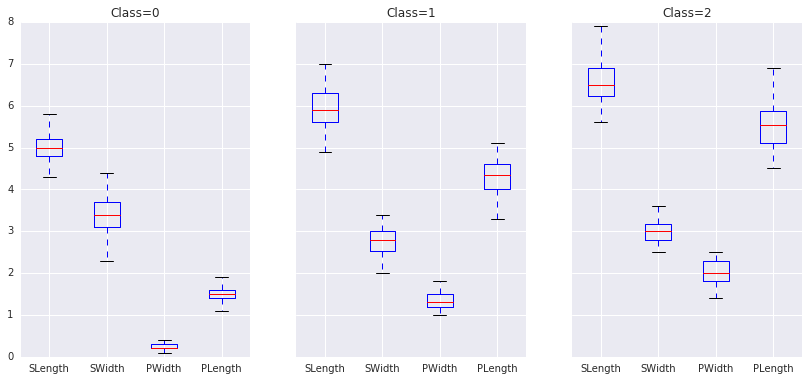

In [114]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(14,6),squeeze=False,sharey=True,)

classes=np.unique(data['Class'].dropna())

boxPlotByClass(data,axes[0,0],classes[0])
boxPlotByClass(data,axes[0,1],classes[1])
boxPlotByClass(data,axes[0,2],classes[2])

## Q-Q Plot

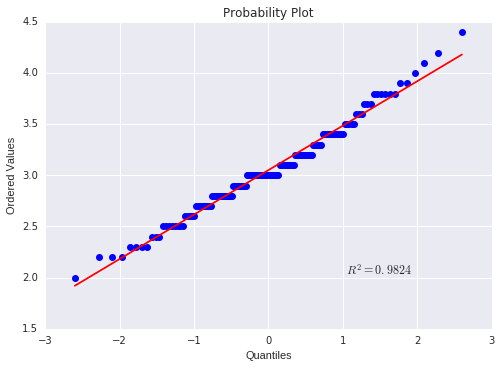

In [105]:
import scipy.stats as stats
stats.probplot(data['SepalWidth'], dist="norm", plot=plt)
plt.show()